In [1]:
import pandas as pd
from tokenizers import (
    decoders,
    models,
    normalizers,
    pre_tokenizers,
    processors,
    trainers,
    Tokenizer
)
from transformers import PreTrainedTokenizerFast

content = pd.read_csv('/home/grt/GloFE/OpenASL/openasl-v1.0.tsv', sep='\t')
translation = content['raw-text'].to_list()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/workspace/openasl-pre/openasl-v1.0.tsv'

In [ ]:
print(translation[5667])
tokenizer = Tokenizer(models.BPE())
tokenizer.normalizer = normalizers.Sequence(
    [normalizers.NFD(), normalizers.Lowercase(), normalizers.StripAccents()]
)
tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False)
trainer = trainers.BpeTrainer(vocab_size=25000, special_tokens=["<s>", "<pad>", "</s>"])
tokenizer.train_from_iterator(translation, trainer=trainer)
tokenizer.post_processor = processors.ByteLevel(trim_offsets=False)
tokenizer.decoder = decoders.ByteLevel()

wrapped_tokenizer = PreTrainedTokenizerFast(
    tokenizer_object=tokenizer,
    model_max_length=1024,
    bos_token="<s>",
    eos_token="</s>",
    pad_token="<pad>"
)

wrapped_tokenizer.save_pretrained('openasl-v1.0/openasl-bpe25000-tokenizer-uncased')

In [2]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('/mnt/workspace/slt_baseline/notebooks/openasl-v1.0/openasl-bpe25000-tokenizer-uncased', local_files_only=True)

In [3]:
print(tokenizer)

PreTrainedTokenizerFast(name_or_path='/mnt/workspace/slt_baseline/notebooks/openasl-v1.0/openasl-bpe25000-tokenizer-uncased', vocab_size=25000, model_max_len=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'pad_token': '<pad>'})


In [6]:
import os
import seaborn as sea
import numpy as np
import pickle as pkl
import torch
from tqdm.notebook import tqdm
from tqdm.contrib.concurrent import thread_map
pose_path = '/mnt/workspace/OpenASL/mmpose'

filenames = os.listdir(pose_path)

def read_length(name):
    pose_path = '/mnt/workspace/OpenASL/mmpose'
    full_path = os.path.join(pose_path, name)
    if os.path.getsize(full_path) > 0:
        with open(full_path, 'rb') as f:
            content = pkl.load(f)
        return len(content)
    else:
        print(full_path)
        return 0
        


sample_length = thread_map(read_length, filenames, max_workers=24)


  0%|          | 0/96998 [00:00<?, ?it/s]

/mnt/workspace/OpenASL/mmpose/969xm4nuwv4-00:11:48.173-00:11:49.576.pkl
/mnt/workspace/OpenASL/mmpose/AFnaBCqKXjY-00:03:13.126-00:03:14.527.pkl
/mnt/workspace/OpenASL/mmpose/AbevUmFjcsM-00:00:35.936-00:00:36.000.pkl
/mnt/workspace/OpenASL/mmpose/B57Q2xr4Zqs-00:00:19.519-00:00:21.739.pkl
/mnt/workspace/OpenASL/mmpose/CnT3ke7yiIY-00:00:14.919-00:00:18.500.pkl
/mnt/workspace/OpenASL/mmpose/CnT3ke7yiIY-00:01:42.500-00:01:45.060.pkl
/mnt/workspace/OpenASL/mmpose/EslZp7UiTck-00:19:03.241-00:19:04.644.pkl
/mnt/workspace/OpenASL/mmpose/FZ0u_44WQck-00:02:03.359-00:02:05.120.pkl
/mnt/workspace/OpenASL/mmpose/IE4BQj7R0KA-00:01:12.406-00:01:13.674.pkl
/mnt/workspace/OpenASL/mmpose/KNSzYn2wGa4-00:10:43.475-00:10:44.476.pkl
/mnt/workspace/OpenASL/mmpose/K_L4B4u6L7Y-00:04:17.958-00:04:19.425.pkl
/mnt/workspace/OpenASL/mmpose/M1UpvJATinc-00:13:20.399-00:13:21.134.pkl
/mnt/workspace/OpenASL/mmpose/N5aSQrkx1fE-00:06:11.170-00:06:13.807.pkl
/mnt/workspace/OpenASL/mmpose/OCljaCDxpb0-00:05:09.480-00:05:57.

In [8]:
valid_length = [x for x in sample_length if x != 0]

<AxesSubplot:ylabel='Count'>

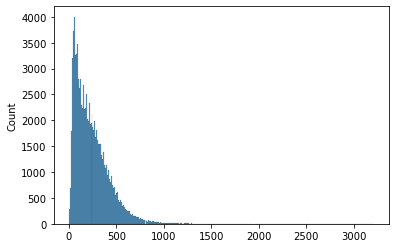

In [9]:
sea.histplot(valid_length)

In [10]:
np.mean(valid_length)

239.3045698370126

In [12]:
(np.array(valid_length) > 512).sum()

7548

In [12]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('/mnt/workspace/slt_baseline/notebooks/openasl-bpe25000-tokenizer-uncased', local_files_only=True)

In [18]:


'56 65 WHEN I FIRST SAW HIM ON TV I WAS INTRIGUED BY HIS HONESTY, EMPATHY, AND INCLUSIVE VISION TO CONNECT WITH ALL AMERICANS, REGARDLESS OF POLITICAL IDEOLOGIES.'.lower()


'56 65 when i first saw him on tv i was intrigued by his honesty, empathy, and inclusive vision to connect with all americans, regardless of political ideologies.'

In [38]:
print(tokenizer)

PreTrainedTokenizerFast(name_or_path='/mnt/workspace/slt_baseline/notebooks/openasl-bpe25000-tokenizer', vocab_size=25000, model_max_len=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'pad_token': '<pad>'})


In [5]:
tokenizer.normalizer

AttributeError: 'PreTrainedTokenizerFast' object has no attribute 'normalizer'

In [16]:
ids = tokenizer.encode('IT\'S ALSO A HELP FOR PEOPLE WITH PROSTHETICS.')
tokenizer.decode(ids)

'its also a help for people with prosthetics'

In [12]:
print(tokenizer)

PreTrainedTokenizerFast(name_or_path='/mnt/workspace/slt_baseline/notebooks/phoe-bpe25000-tokenizer', vocab_size=5530, model_max_len=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'pad_token': '<pad>'})


In [17]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [18]:
tokenizer.tokenize('At least 20 people were killed, 26 others wounded.')

['at',
 'least',
 '20',
 'people',
 'were',
 'killed',
 ',',
 '26',
 'others',
 'wounded',
 '.']